In [1]:
import katdal
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import pickle

In [2]:
#filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/16/1481853606.h5'
filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/16/1481893206.h5'

In [3]:
h = katdal.open(filename)

In [4]:
print h

Name: /var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/16/1481893206.h5 (version 3.0)
Observer: Simphiwe  Experiment ID: 20161215-0060
Description: 'Generic Phaseup for all targets'
Observed from 2016-12-16 15:00:07.539 SAST to 2016-12-16 15:04:55.418 SAST
Dump rate / period: 0.25011 Hz / 3.998 s
Subarrays: 1
  ID  Antennas                            Inputs  Corrprods
   0  m006,m007,m008,m010,m014,m015,m021,m022,m025,m031,m062,m063  24      312
Spectral Windows: 1
  ID Band Product  CentreFreq(MHz)  Bandwidth(MHz)  Channels  ChannelWidth(kHz)
   0 L    bc856M4k   1284.000         856.000           4096       208.984
-------------------------------------------------------------------------------
Data selected according to the following criteria:
  subarray=0
  ants=['m008', 'm010', 'm007', 'm014', 'm006', 'm063', 'm015', 'm021', 'm022', 'm025', 'm031', 'm062']
  spw=0
-------------------------------------------------------------------------------
Shape: (72 dumps, 4096 chan

In [5]:
# check what cal products we have
print 'Solutions:'
print '    Product             Number of solutions'
for k in h.file['TelescopeState'].keys():
    if 'cal_product' in k:
        print '   ', k, ' --- ' , len(h.file['TelescopeState'][k])

Solutions:
    Product             Number of solutions
    cal_product_B  ---  8
    cal_product_K  ---  8
    cal_product_G  ---  16


In [6]:
np.set_printoptions(precision=4,suppress=True)

In [7]:
# check antenna ordering
print h.file['TelescopeState']['cal_antlist']
a_list=[]
aa=h.file['TelescopeState']['cal_antlist']
for i,ai in enumerate(aa):
    a_list.append(pickle.loads(ai[1]))
a_array=np.array(a_list)
print a_list
print a_array[0]
labels=a_array[0]

<HDF5 dataset "cal_antlist": shape (1,), type "|V162">
[['m006', 'm007', 'm008', 'm010', 'm014', 'm015', 'm021', 'm022', 'm025', 'm031', 'm062', 'm063']]
['m006' 'm007' 'm008' 'm010' 'm014' 'm015' 'm021' 'm022' 'm025' 'm031'
 'm062' 'm063']


# Delays

In [8]:
k = h.file['TelescopeState']['cal_product_K']
k_list = []
for i, ki in enumerate(k):
    k_list.append(pickle.loads(ki[1]))
k_array = np.array(k_list)

k_0 = k_array[:,0,:]*1e9
k_1 = k_array[:,1,:]*1e9

In [9]:
k_array.shape #Times,Pols,Antennas

(8, 2, 12)

In [10]:
# print delays (if there are few delays)
print 'POL 0: \n', k_0[0], "\n",k_0[-1]
print 'POL 1: \n', k_1[0],"\n" ,k_1[-1]

POL 0: 
[ 134.537    60.8246  102.9964   14.9691  114.6164  117.9323  504.8199
  501.157    -0.     -154.5461  111.2804  104.091 ] 
[ 134.4979   60.8058  102.9562   14.9123  114.5726  117.9143  504.609
  500.9839   -0.     -154.579   111.3147  104.0815]
POL 1: 
[ 136.4524   59.0854  102.0161  107.269   114.7739  116.2273  502.5828
  498.8899    0.     -154.6534  106.0152   98.7143] 
[ 136.417    59.0618  101.9694  107.2084  114.7201  116.1956  502.3359
  498.6785   -0.     -154.6871  106.0305   98.748 ]


In [11]:
print labels

['m006' 'm007' 'm008' 'm010' 'm014' 'm015' 'm021' 'm022' 'm025' 'm031'
 'm062' 'm063']


In [12]:
colors=['r','g','b','c','m','k','darkorange','darkgreen','maroon','darkviolet','olive','saddlebrown','darkorchid']

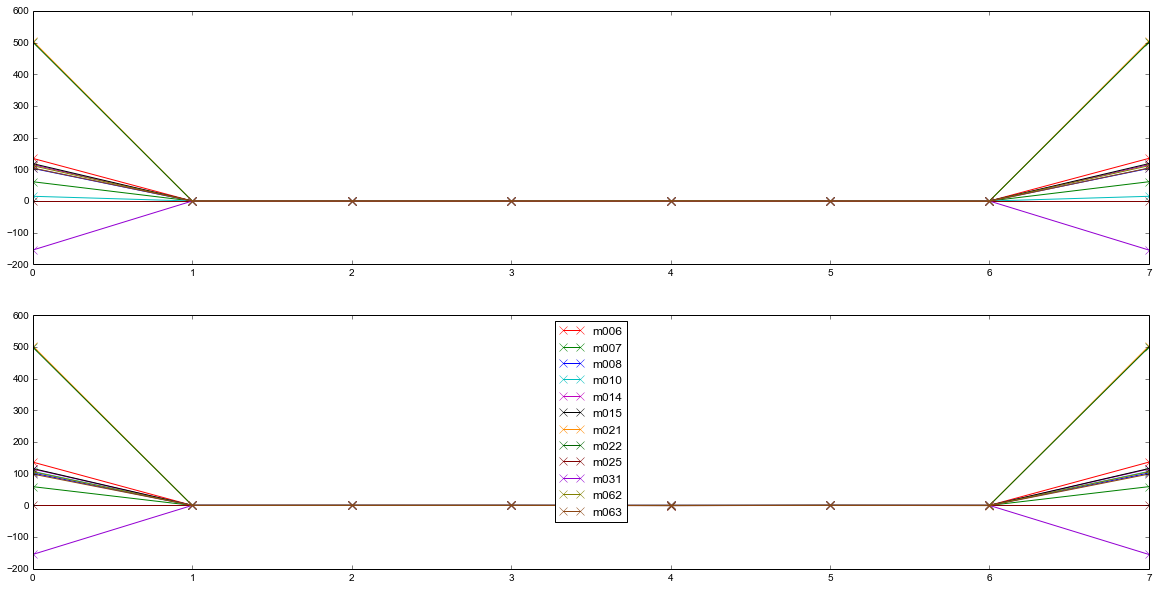

In [13]:
#plot delays (if there are many delays)
fig, ax = plt.subplots(2,1,figsize=(20, 10))
for i in range(len(labels)):
    ax[0].plot(k_0[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[0].set_ylim([-0.2,0.2]);
    ax[1].plot(k_1[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[1].set_ylim([-0.2,0.2]);
plt.legend(loc='upper center')

# Gains

In [14]:
g = h.file['TelescopeState']['cal_product_G']
g_list = []
for i, gi in enumerate(g):
    g_list.append(pickle.loads(gi[1]))
g_array = np.array(g_list)
print g_array.shape

g_0 = g_array[:,0,:]
g_1 = g_array[:,1,:]

(16, 2, 12)


In [15]:
#First
print np.abs(g_0)[0]
print np.abs(g_1)[0]

[ 1.0005  1.0004  1.0001  0.9994  1.0022  0.9994  0.9985  0.9996  1.0004
  1.0007  1.0003  1.0004]
[ 0.9999  0.9994  0.9999  1.0001  1.0017  1.0004  0.9992  1.0003  1.0005
  0.9999  1.0001  1.0001]


In [16]:
#Last
print np.abs(g_0)[-1]
print np.abs(g_1)[-1]

[ 0.9968  0.9958  0.9969  1.0011  1.0012  0.9964  0.9997  0.9971  1.0005
  0.9999  0.9961  1.0014]
[ 0.9955  0.9968  0.9955  1.001   0.9993  0.9973  0.9994  1.0002  0.9993
  0.9993  0.997   1.0016]


In [17]:
#Ratio
print np.abs(g_0)[-1]/np.abs(g_0)[0]
print np.abs(g_1)[-1]/np.abs(g_1)[0]

[ 0.9963  0.9955  0.9968  1.0017  0.999   0.9969  1.0013  0.9975  1.0001
  0.9992  0.9958  1.001 ]
[ 0.9956  0.9974  0.9956  1.0009  0.9976  0.9969  1.0001  0.9998  0.9987
  0.9994  0.9969  1.0015]


In [18]:
#Before
print np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[0])

[  61.1163   73.6873  124.4256   62.2384  138.6618   75.7357  124.566
   69.0931    0.       -6.8527  145.8431   29.6805]
[ 46.8608  88.0962  92.6482  72.5175  68.9983  49.1144  95.8231  39.0016
   0.      37.3623  73.9004  95.8075]


In [19]:
#After
print np.rad2deg(np.angle(g_0)[-1])
print np.rad2deg(np.angle(g_1)[-1])

[  71.9142   76.7162  132.3263   77.0473  150.8744   78.8461  112.4293
   57.8154    0.        7.7902  137.0078   45.7573]
[  56.5848   92.9685  102.6332   89.104    86.4777   58.9093  100.8219
   45.1677    0.       52.5009   74.2275   90.3175]


In [20]:
#Differences
print np.rad2deg(np.angle(g_0)[-1])-np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[-1])-np.rad2deg(np.angle(g_1)[0])

[ 10.7979   3.0289   7.9007  14.8088  12.2126   3.1103 -12.1367 -11.2777
   0.      14.6429  -8.8354  16.0768]
[  9.7241   4.8722   9.985   16.5866  17.4794   9.7949   4.9988   6.1661
   0.      15.1385   0.3271  -5.4901]


/usr/lib/pymodules/python2.7/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


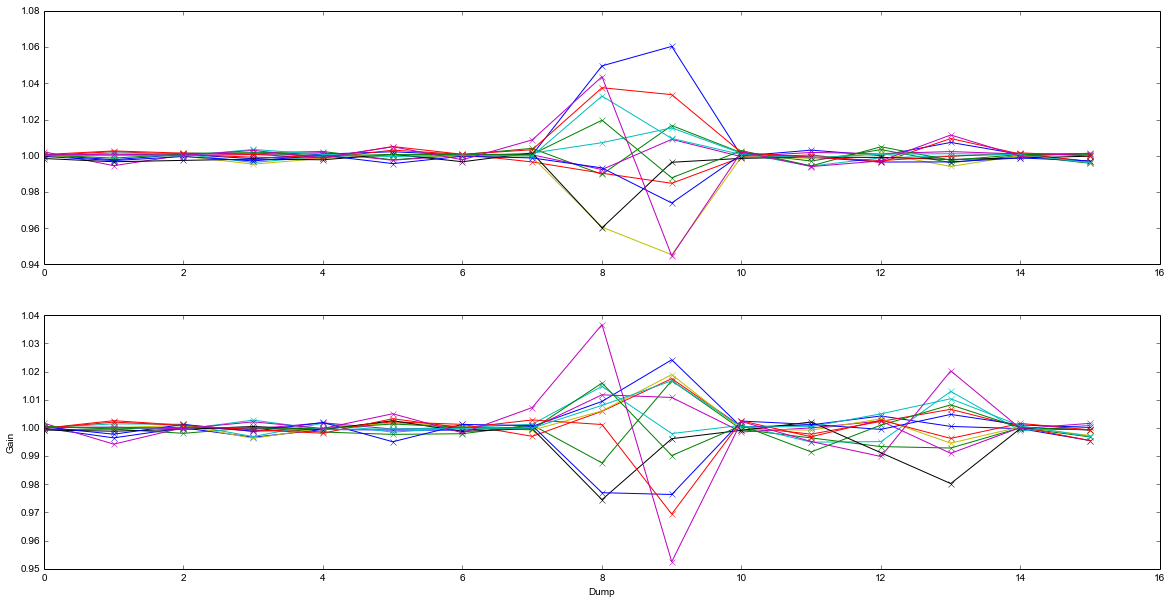

In [21]:
#plot gains - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(g_0),'-x');
#ax[0].set_ylim([0,5.0]);
ax[1].plot(np.abs(g_1),'-x');
#ax[1].set_ylim([0,5.0]);
plt.xlabel('Dump')
plt.ylabel('Gain')
plt.legend()

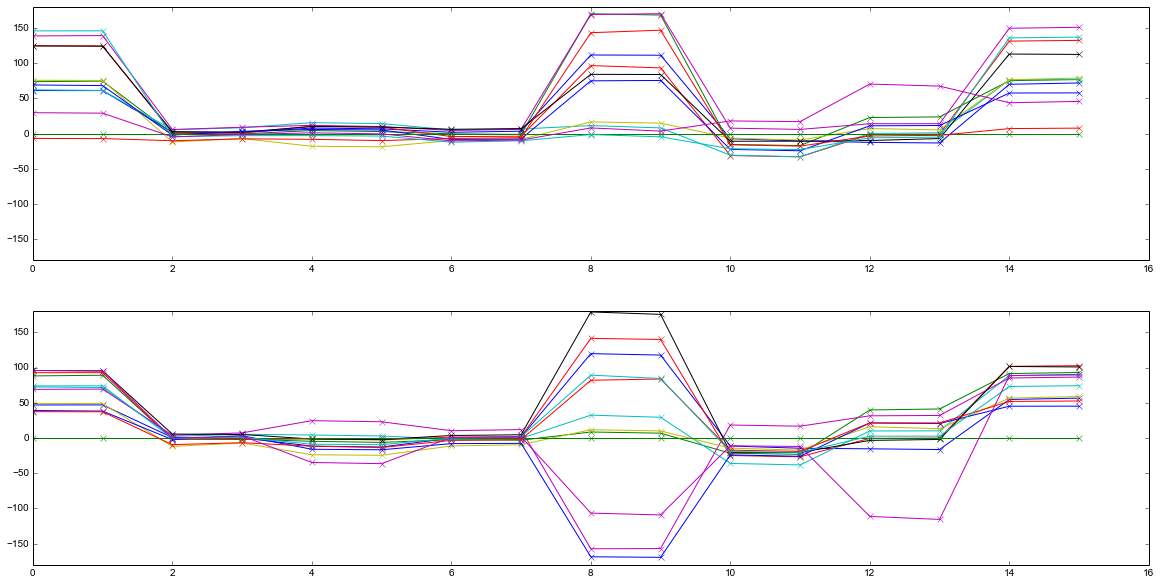

In [22]:
#plot gains - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(g_0)),'-x');
ax[0].set_ylim([-180,180]);
ax[1].plot(np.rad2deg(np.angle(g_1)),'-x');
ax[1].set_ylim([-180,180]);

# Bandpasses    

In [23]:
b = h.file['TelescopeState']['cal_product_B']
b_list = []
for i, bi in enumerate(b):
    b_list.append(pickle.loads(bi[-1]))
b_array = np.array(b_list)
print b_array.shape
# bandpass shape is ntimes x channels x pol x antenna 
# where ntimes is the number of bandpasses

# just look at LAST bandpass for now
b_0_0 = b_array[-1,:,0,:]
b_1_0 = b_array[-1,:,1,:]



(8, 4096, 2, 12)


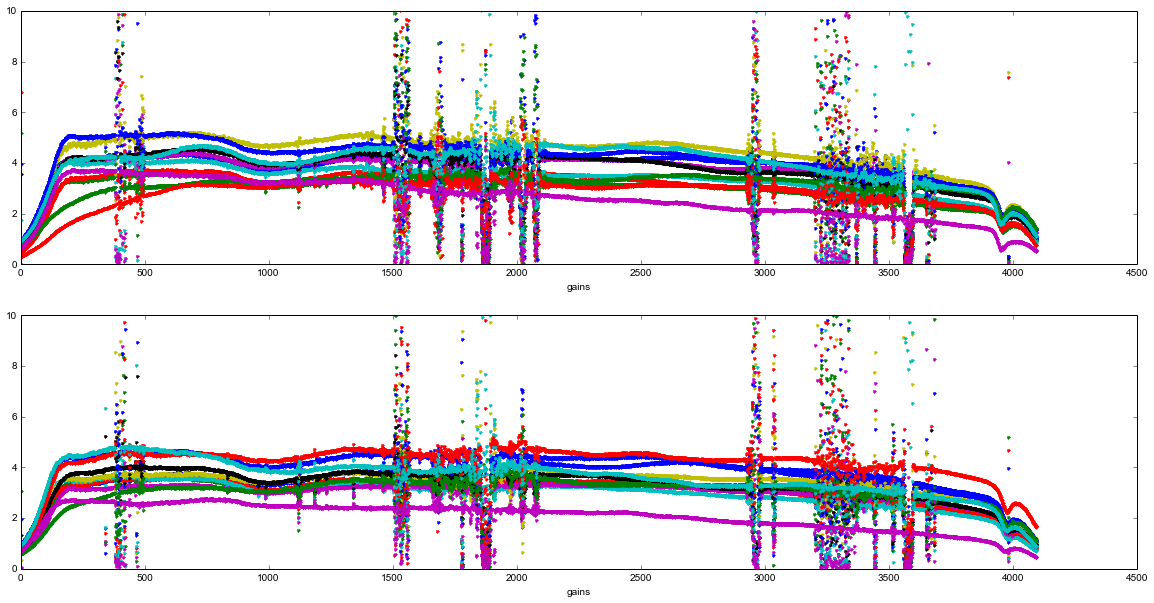

In [24]:
#plot bandpass - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(b_0_0),'.');
ax[0].set_ylim([0,10]);
ax[0].set_xlabel('gains')
ax[1].plot(np.abs(b_1_0),'.');
ax[1].set_ylim([0,10]);
ax[1].set_xlabel('gains')
#plt.xlabel('channel')
#plt.ylabel('gains')

In [25]:
""""
for i in range(len(labels)):
    ax[0].plot(k_0[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[0].set_ylim([-0.2,0.2]);
    ax[1].plot(k_1[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[1].set_ylim([-0.2,0.2]);
plt.legend(loc='upper center')
"""

'"\nfor i in range(len(labels)):\n    ax[0].plot(k_0[:,i],\'-x\',markersize=8,label=labels[i],color=colors[i]);\n#ax[0].set_ylim([-0.2,0.2]);\n    ax[1].plot(k_1[:,i],\'-x\',markersize=8,label=labels[i],color=colors[i]);\n#ax[1].set_ylim([-0.2,0.2]);\nplt.legend(loc=\'upper center\')\n'

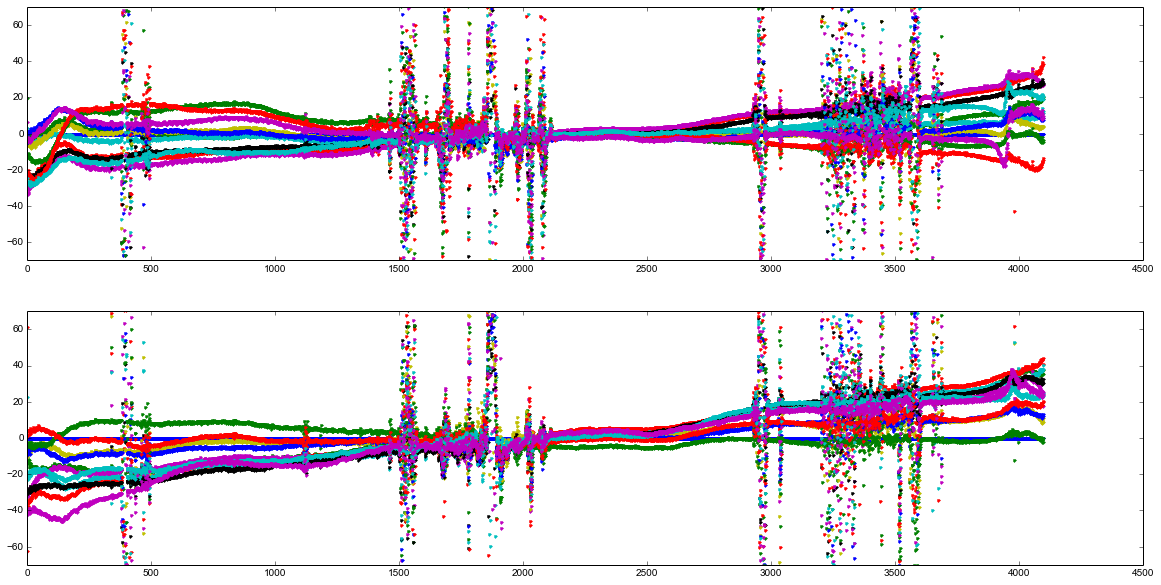

In [26]:
#plot bandpass - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].set_ylim([-70,70]);
ax[1].set_ylim([-70,70]);
ax[0].plot(np.rad2deg(np.angle(b_0_0)),'.');
ax[1].plot(np.rad2deg(np.angle(b_1_0)),'.');
plt.legend()

In [27]:
len(labels)

12

In [28]:
b_array.shape
# Time,channels,pols,antennas

(8, 4096, 2, 12)

In [29]:
#One bandpass at the END
antn=11
b_0_1 = b_array[-1,:,0,antn]
b_1_1 = b_array[-1,:,1,antn]
print b_1_1.shape
print a_array[:,antn]

(4096,)
['m063']


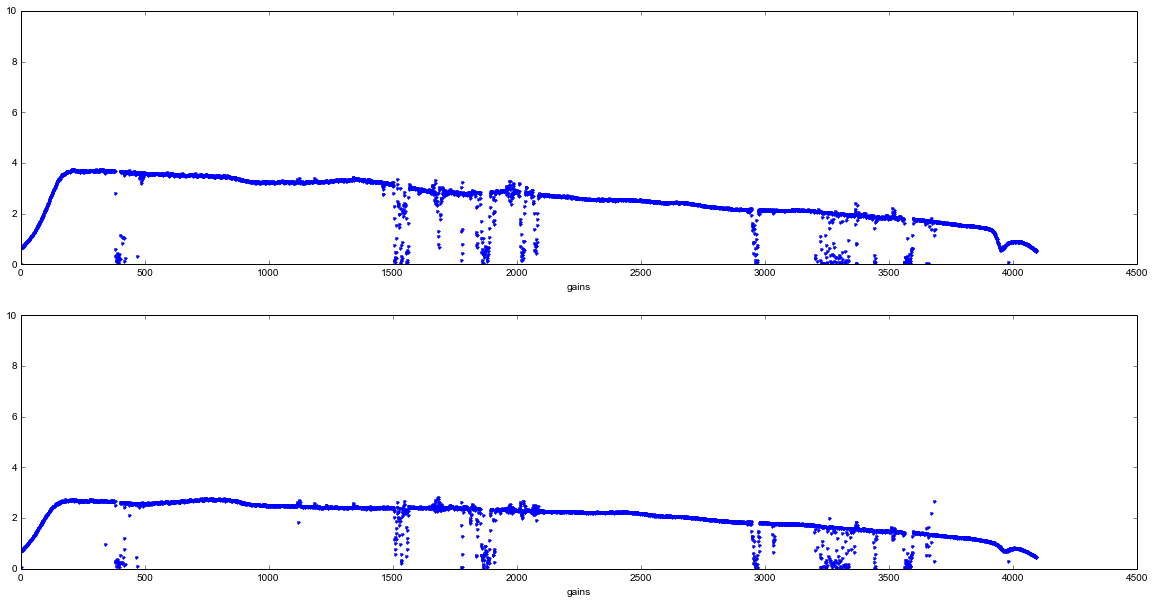

In [30]:
#plot bandpass - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(b_0_1),'.');
ax[0].set_ylim([0,10]);
ax[0].set_xlabel('gains')
ax[1].plot(np.abs(b_1_1),'.');
ax[1].set_ylim([0,10]);
ax[1].set_xlabel('gains')
#plt.xlabel('channel')
#plt.ylabel('gains')

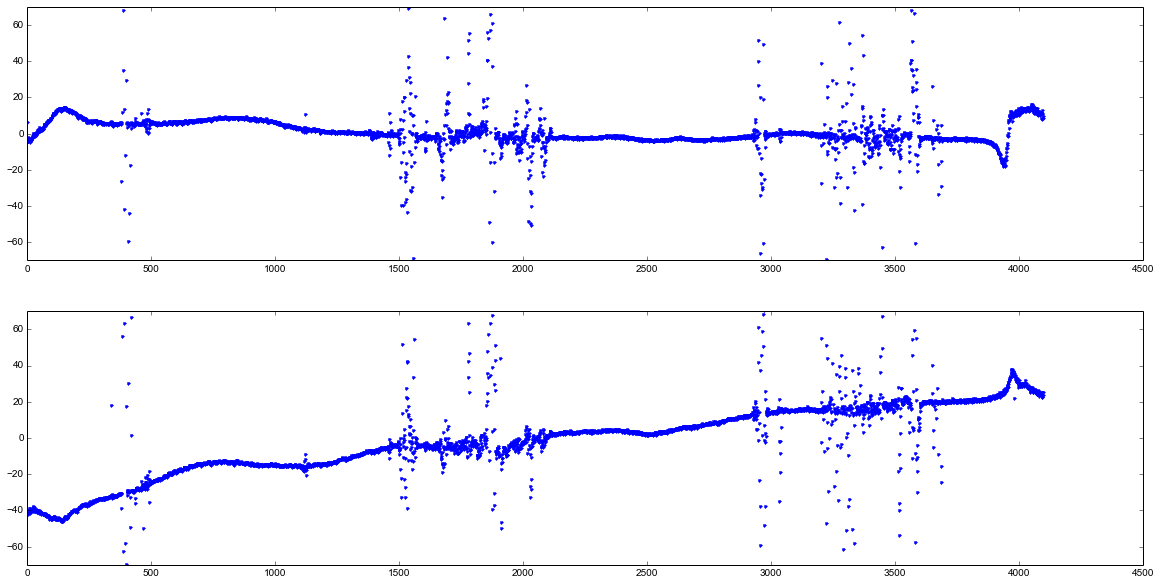

In [31]:
#plot bandpass - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(b_0_1)),'.');
ax[0].set_ylim([-70,70]);
ax[1].plot(np.rad2deg(np.angle(b_1_1)),'.');
ax[1].set_ylim([-70,70]);

In [32]:
str(h.catalogue.targets[0])

'PKS 1934-63 (J1939-6342), tags=radec bfcal single_accumulation, 19:39:25.03 -63:42:45.7, flux defined for 200 - 12000 MHz'

# M063 crazy solutions